# Exploratory Data Analysis Notebook

## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## Importing Dataset

In [2]:
data = fetch_ucirepo(id=863)

In [3]:
print(data.variables)

          name     role         type demographic  \
0          Age  Feature      Integer         Age   
1   SystolicBP  Feature      Integer        None   
2  DiastolicBP  Feature      Integer        None   
3           BS  Feature      Integer        None   
4     BodyTemp  Feature      Integer        None   
5    HeartRate  Feature      Integer        None   
6    RiskLevel   Target  Categorical        None   

                                         description   units missing_values  
0    Any ages in years when a women during pregnant.    None             no  
1  Upper value of Blood Pressure in mmHg, another...    None             no  
2  Lower value of Blood Pressure in mmHg, another...    None             no  
3  Blood glucose levels is in terms of a molar co...  mmol/L             no  
4                                               None       F             no  
5                        A normal resting heart rate     bpm             no  
6  Predicted Risk Intensity Level dur

In [4]:
X = data.data.features
y = data.data.targets
print(X.head())
print(y.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76
   RiskLevel
0  high risk
1  high risk
2  high risk
3  high risk
4   low risk


In [5]:
data = pd.concat([X,y],axis=1)
data.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
152,17,110,75,12.0,101.0,76,high risk
134,40,120,95,11.0,98.0,80,high risk
286,23,120,90,7.7,98.0,60,low risk
807,31,120,60,6.1,98.0,76,mid risk
646,23,120,85,8.0,98.0,70,low risk
259,21,120,80,6.9,98.0,76,low risk
244,12,95,60,7.2,98.0,77,low risk
239,25,120,90,12.0,101.0,80,high risk
111,38,135,60,7.9,101.0,86,high risk
1001,60,120,85,15.0,98.0,60,high risk


In [6]:
data.rename(columns={'BS':'BloodSugar'}, inplace=True)

## Describing Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BloodSugar   1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
data.describe()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [10]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [11]:
data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [12]:
data['RiskLevel'].value_counts(normalize=True)

RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64

## Analyzing & Visualizing Dataset

### Univariate Analysis

Analyzing and understanding how the values of each feature and target are varying (independently).

#### Bar Chart for RiskLevel

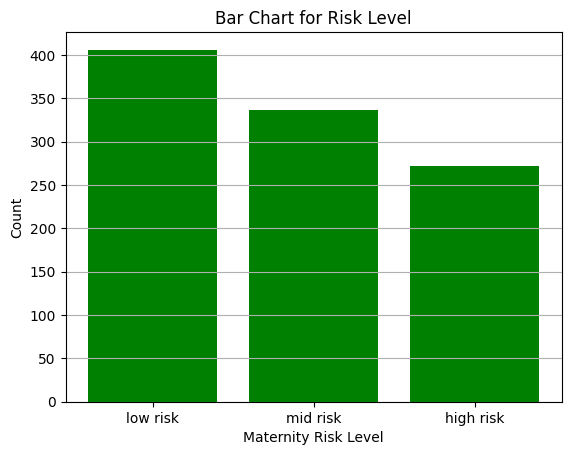

In [13]:
risk_counts = data['RiskLevel'].value_counts()
plt.grid(axis='y')
plt.bar(risk_counts.index, risk_counts.values, color='green')
plt.xlabel("Maternity Risk Level")
plt.ylabel("Count")
plt.title("Bar Chart for Risk Level")
plt.show()

Majority of the instances in this dataset are of women whose health is at at low risk, followed by those at mid risk, and lastly at high risk.

#### Histograms for Numerical Features

In [14]:
numeric_cols = list(data.select_dtypes(exclude='object').columns)
numeric_cols

['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']

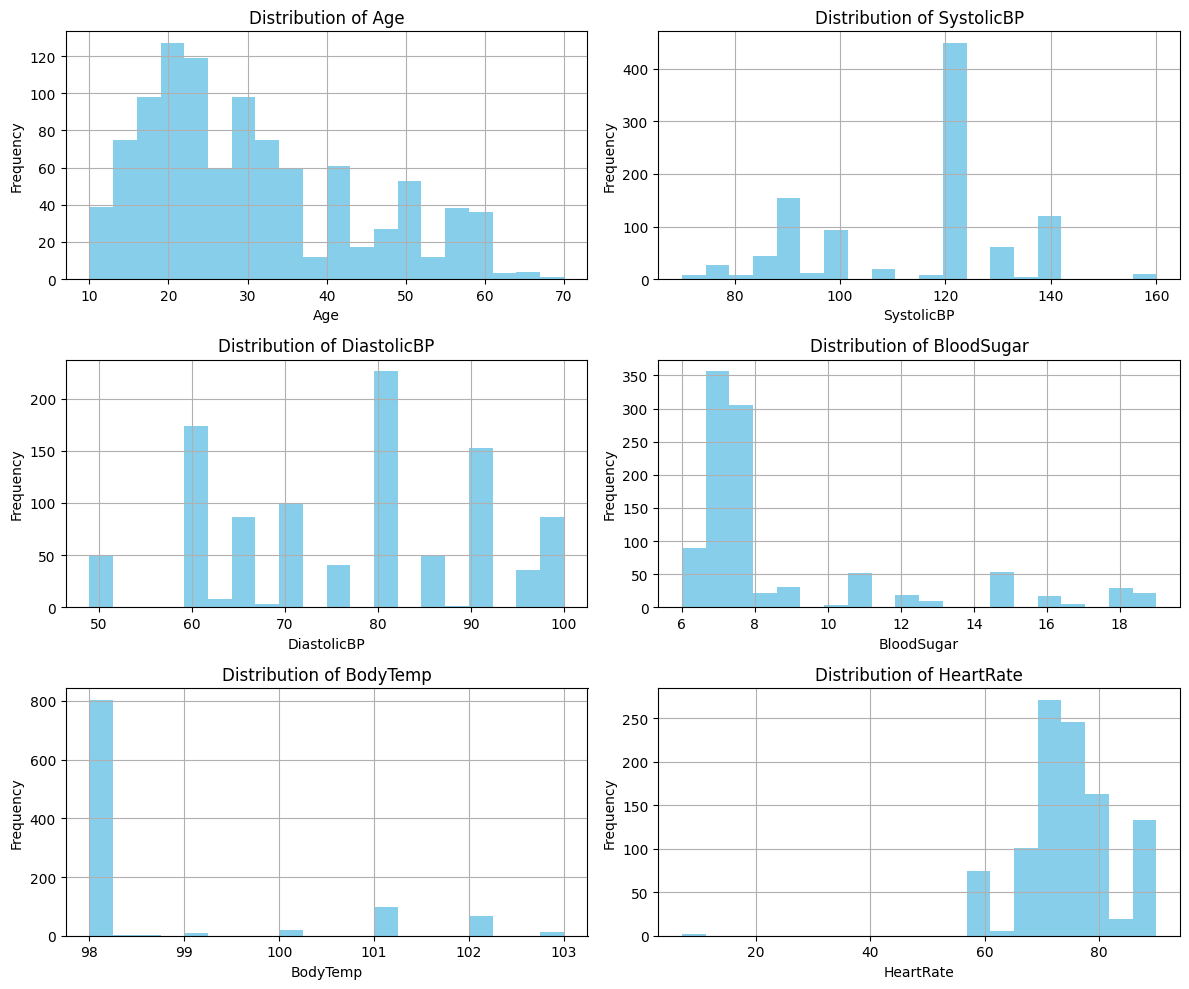

In [15]:
fig, axes = plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col], bins=20, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

1. Age is one of the features that takes a wide range of values, giving it the resemblance of a normal distribution that is positively skewed. The skewness indicates that majority of the women recorded belong to the younger population. Most are under 50, which is valid as pregnancy by age 50 and above is uncharacteristic. Quite shockingly this dataset consists of records of pregnant women starting from age 10. The highest peaks occur between age 16 and 25. 
2. SystolicBP, DiastolicBP, and BodyTemp take only a few unique values, and the values of highest frequency are 120, 80, and 98, respectively, which are the normal values. Only around 250 women have normal diastolic blood pressure, 40-45% have a normal systolic BP, and nearly 80% have normal body temperature. Hence, it appears that DiastolicBP captures most variations in the women's health, followed by systolicBP.
3. Majority of the blood sugar measurements lie between 6 and 8. Since, the data description doesn't specify whether or not the blood sugar was tested in fasting, we can assume these are random blood glucose measurements, in which case less than 11 mmol/L is considered non-diabetic. Hence, more than 70% of the women do not seem to have diabetes, while the remaining do at different levels of criticality.
4. HeartRate also has a near normal distribution, with a some outliers. The peak is at 70-72 which is the normal value for heart rate.

### Bivariate Analysis

Analyzing and understanding how the target (RiskLevel) is related to each of the different numerical features.

#### Grouped Summary Statistics
Mean, Median, Standard Deviation for each feature per RiskLevel

In [20]:
agg_funcs = ['mean', 'median','std']
data.groupby('RiskLevel').agg({
    'Age': agg_funcs,
    'SystolicBP': agg_funcs,
    'DiastolicBP': agg_funcs,
    'BloodSugar': agg_funcs,
    'BodyTemp': agg_funcs,
    'HeartRate': agg_funcs
}).T

RiskLevel            high risk    low risk    mid risk
Age         mean     36.216912   26.869458   28.363095
            median   35.000000   22.000000   25.000000
            std      13.032206   13.121661   12.552660
SystolicBP  mean    124.194853  105.866995  113.154762
            median  130.000000  120.000000  120.000000
            std      20.227185   15.894002   14.983170
DiastolicBP mean     85.073529   72.534483   74.232143
            median   90.000000   75.000000   75.000000
            std      14.112428   13.054210   11.490151
BloodSugar  mean     12.122610    7.220271    7.795744
            median   11.000000    7.500000    7.000000
            std       4.173525    0.645596    2.285511
BodyTemp    mean     98.899265   98.368966   98.833333
            median   98.000000   98.000000   98.000000
            std       1.558692    1.108941    1.433779
HeartRate   mean     76.742647   72.770936   74.175595
            median   77.000000   70.000000   76.000000
            std       8.697878    8.293341    6.767490

* As expected all numeric features have higher values on average for mothers at high risk and lower mean for low risk.
    * Older mothers are clearly at higher risk than younger ones. Similar observation can be made based on the median values as well.
    * High risk mothers tend to have higher systolic and diastolic BP on average. The median systolic bp is also highest for mothers at high risk, but it is the same for mothers at mid and low risk. The same pattern is seen for median diastolic bp. So, elevated systolic and diastolic BP indicates some higher risk level, but differentiating between low and mid risk levels maybe slightly difficult.
    * Mean blood sugar is highest for mothers at high risk. For mid and low risk mothers the mean values are much lower than high risk and also proportionally (low risk has lower mean blood sugar than mid risk), but the differences are lower. Median blood sugar is also highest for high risk mothers, but lowest for mid risk mothers than low risk, although the difference between them both are much smaller. So blood sugar levels mostly seem to be good indicators of risk levels.
    * The mean body temperatures are proportional to the risk level but the difference between them are very small, and mediam body temperatures are the same for mothers at all risk levels. Body Temperature may not be a strong differentiator of risk levels.
    * Mean and median heart rate values are proportional to the risk levels but the differences are not large enough to make a clear distinction.
* Spread or variability in age, systolic bp, diastolic bp, and heart rate are highest for high risk mothers and second highest for low risk mothers, so there could be some very high or very low values for those features in high and low risk classes, which could possibly mislead into classifying some of those instances as mid risk instead.
* Variation in blood sugar values is highest of high risk mothers and lowest for low risk. The same follows for body temperature values but the differences in those standard deviations are very small.
* So in conclusion, Blood Sugar seems to be the strongest differentiator for risk level, followed by systolic and diastolic BPs and age. Body temperature is a weak separator.

#### Violin Plots

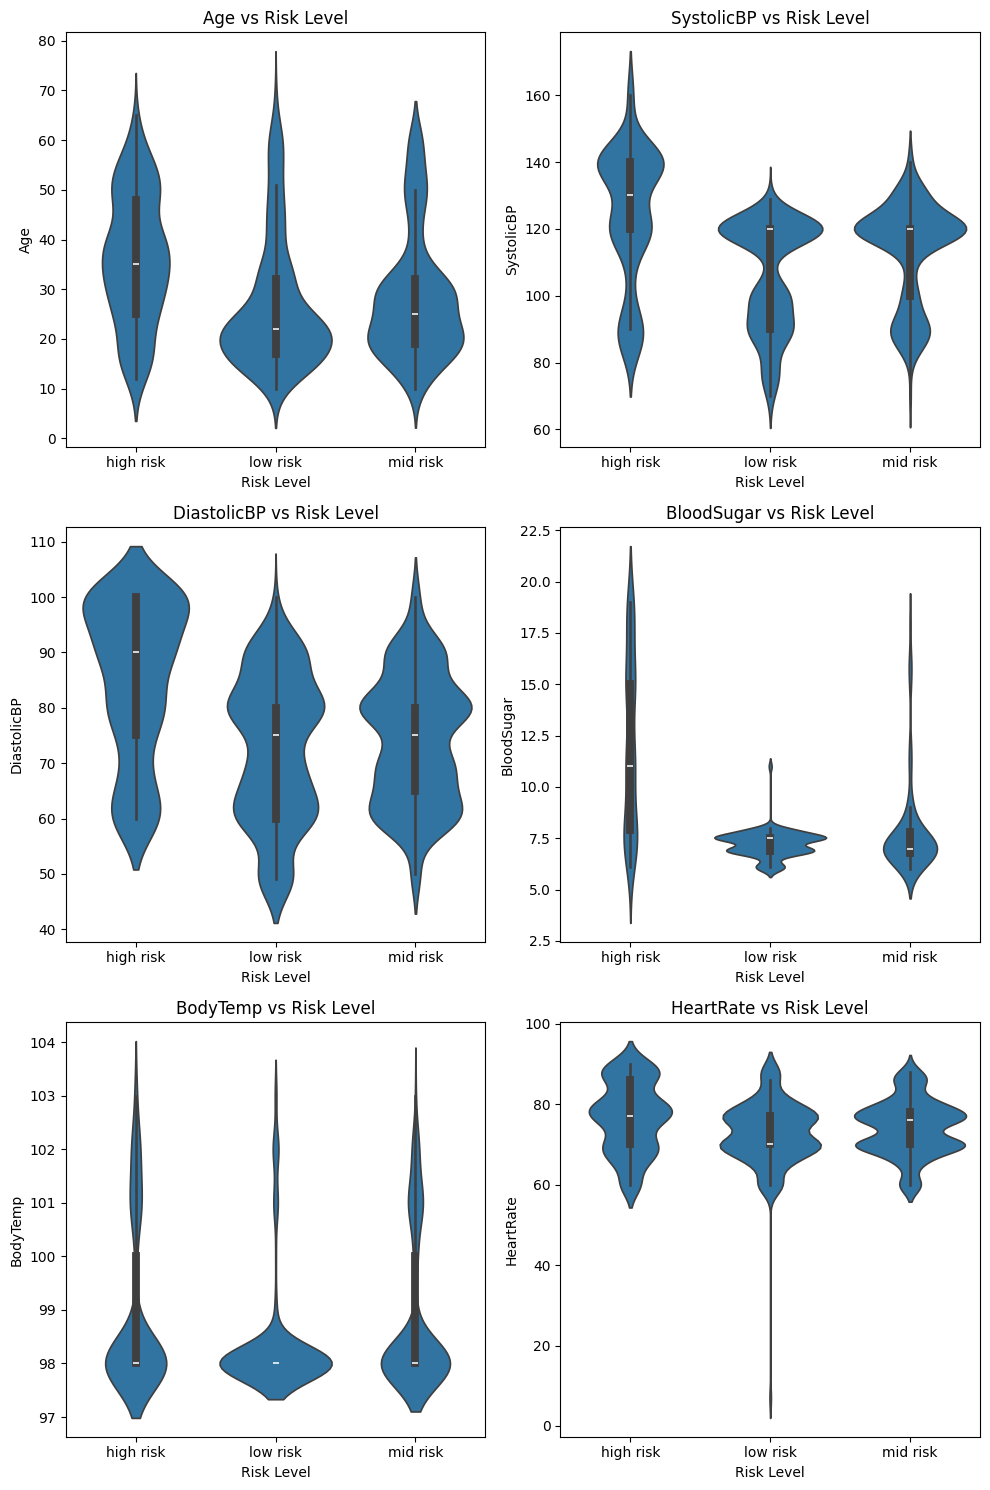

In [26]:
fig, axes = plt.subplots(3,2, figsize=(10,15))
axes = axes.flatten()
for i, feature in enumerate(numeric_cols):
    sns.violinplot(x='RiskLevel', y=feature,
                   data=data, ax=axes[i])
    axes[i].set_xlabel('Risk Level')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f"{feature} vs Risk Level")

plt.tight_layout()
plt.show()

* Mothers at low and mid risk are clearly younger as the distribution is distinctly densest for both risk levels at lower ages. High risk mothers are older but they also show high spread.
* High risk mothers have higher systolic bp. While, majority of low and mid risk mothers have normal systolic bp value at around 120. So, there is some overlap between low and mid risk, but low risk mothers show higher distribution densities at lower systolic bp values that mid risk. Very low values for mid risk seem to be outliers.
* For diastolic bp, higher values around 100 are the densest only for high risk mothers. Low risk and mid risk show high spread in diastolic bp, but the densest portion lies at normally acceptable value of around 80. There is some overlap between low risk and high risk values.
* High risk mothers show very high variability in blood sugar values although the mean is much higher than low and mid risk. Low and mid risk mothers show very small variability, with almost same low mean/median values, and there seem to be some otuliers in both groups.
* Body temperature has nearly the same distribution for all 3 risk levels, with the presence of similar outliers in all.
* Heart rate values are also distributed quite similarly for all risk levels, although the median is slightly higher for high risk mothers. There are some sharp outliers in the low risk group.
* Clearly blood sugar, systolic and diastolic bp, and age are better separators of the 3 risk levels.

#### ANOVA

#### Kruskal-Wallis

### Multivariate Analysis

### Outlier Detection